# Cleaning and analysing data on Star Wars


# 1. Introduction

While waiting for *Star Wars: The Force Awakens to come out*, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

For this project, we'll be cleaning and exploring the data set in Jupyter notebook. 

# 2. Exploring data

First, we will read the data into pandas dataframe and explore the data

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

There are certain columns not showing up in the final result, so we will review the columns names to see all the columns included in the dataset.

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

First, we'll need to remove the invalid rows. For example, <span style="background-color: pink">RespondentID</span> is supposed to be a unique ID for each respondent, but it's blank in some rows. We'll need to remove any rows with an invalid RespondentID.

In [3]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

#check result
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

## 3. Cleaning and Mapping Yes/No Columns

When we look at the next two columns, which are:

- <span style="color:red"> Have you seen any of the 6 films in the Star Wars franchise? </span>.
- <span style="color:red"> Do you consider yourself to be a fan of the Star Wars film franchise?</span>

Both represent <span style="color:red">Yes/No</span> questions. They can also be <span style="color:red">NaN</span> where a respondent chooses not to answer a question. We can use the [pandas.Series.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are <span style="color:red">Yes</span> and <span style="color:red">No</span>. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values <span style="color:red">True</span>, <span style="color:red">False</span>, and <span style="color:red">NaN</span>. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

We will use the [pandas.Series.map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) method on series objects to perform the conversion.

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()
# star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
yes_no = {"Yes": True, "No": False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']= star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

# check results
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some col

## 4. Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, <span style="background-color: pink"> Which of the following Star Wars films have you seen? Please select all that apply.<span>

The columns for this question are:

- <span style="background-color: pink">Which of the following Star Wars films have you seen? Please select all that apply.</span> - Whether or not the respondent saw <span style="background-color: pink">Star Wars: Episode I The Phantom Menace.
- <span style="background-color: pink">Unnamed: 4</span> - Whether or not the respondent saw <span style="background-color: pink">Star Wars: Episode II Attack of - the Clones</span>.
- <span style="background-color: pink">Unnamed: 5</span> - Whether or not the respondent saw <span style="background-color: pink">Star Wars: Episode III Revenge of the Sith</span>.
- <span style="background-color: pink">Unnamed: 6</span> - Whether or not the respondent saw <span style="background-color: pink">Star Wars: Episode IV A New Hope</span>.
- <span style="background-color: pink">Unnamed: 7</span> - Whether or not the respondent saw <span style="background-color: pink">Star Wars: Episode V The Empire Strikes Back</span>.
- <span style="background-color: pink">Unnamed: 8</span> - Whether or not the respondent saw <span style="background-color: pink">Star Wars: Episode VI Return of the Jedi</span>.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is <span style="background-color: pink">NaN</span>, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. 

In [6]:
# convert column values to boolean values
import numpy as np
# movie_map = {'Star Wars: Episode I  The Phantom Menace': True, 
#               np.nan: False,
#              'Star Wars: Episode II  Attack of the Clones':True,
#              'Star Wars: Episode III  Revenge of the Sith':True,
#              'Star Wars: Episode IV  A New Hope':True,
#              'Star Wars: Episode V The Empire Strikes Back':True,
#              'Star Wars: Episode VI Return of the Jedi':True
#               }


for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map({star_wars.loc[1, col]:True, np.nan: False})
    
# # # check results
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
# Rename the columns
i = 1
for col in star_wars.columns[3:9]:
    star_wars = star_wars.rename(columns={col:'seen_'+ str(i)})
    i+=1
  
# check results
star_wars.head()  

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## 5. Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. <span style="background-color: pink"> 1</span> means the film was the most favorite, and <span style="background-color: pink"> 6</span> means it was the least favorite. Each of the following columns can contain the value <span style="background-color: pink"> 1, 2, 3, 4, 5, 6, or NaN </span>:

- <span style="background-color: pink">Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.</span> - How much the respondent liked <span style="background-color: pink">Star Wars: Episode I The Phantom Menace.

- <span style="background-color: pink">Unnamed: 10</span> - How much the respondent liked <span style="background-color: pink">Star Wars: Episode II Attack of - the Clones</span>.

- <span style="background-color: pink">Unnamed: 11</span> - How much the respondent liked <span style="background-color: pink">Star Wars: Episode III Revenge of the Sith</span>.

- <span style="background-color: pink">Unnamed: 12</span> - How much the respondent liked <span style="background-color: pink">Star Wars: Episode IV A New Hope</span>.

- <span style="background-color: pink">Unnamed: 13</span> - How much the respondent liked <span style="background-color: pink">Star Wars: Episode V The Empire Strikes Back</span>.

- <span style="background-color: pink">Unnamed: 14</span> - How much the respondent liked <span style="background-color: pink">Star Wars: Episode VI Return of the Jedi</span>.

These columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [8]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

In [9]:
i = 1
for col in star_wars.columns[9:15]:
    star_wars = star_wars.rename(columns = {col:'ranking_'+str(i)})
    i+=1
    
# Check results    
print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


## 6. Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly.

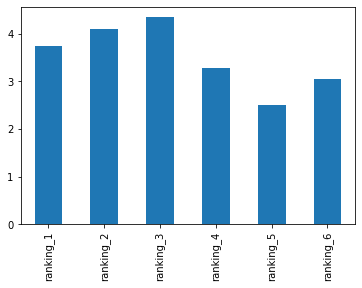

In [10]:
# compute the mean of each of the ranking columns
avg_rank =  star_wars.iloc[:,9:15].mean()

# Make a bar chart of each movie
import matplotlib.pyplot as plt

%matplotlib inline
avg_rank.plot.bar()

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. It looks like the earlier movies (4 to 6) are more highly rated than the new ones, which indicates that the earlier ones are more popular.


## 7. Finding the most Viewed Movie

Next we will find out which movie is most viewed by fans.

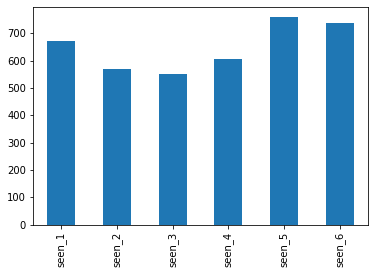

In [11]:
star_wars.iloc[:, 3:9].sum().plot.bar()

Similar to the ranking situation, the earlier movies seems to be seen by more people than the newer ones. This agrees with what is suggested by the ranking results.

## 8. Exploring the Data by Binary Segments

### 8.1 Exploring the Data by Gender Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded.

We can split the dataframe into two groups based on a binary column by creating two subsets of that column. We will use the Gender column as our base to split the data and redo the previous analysis.

In [12]:
males = star_wars[star_wars['Gender']=='Male']
females = star_wars[star_wars['Gender']=='Female']

male_ranking = males.iloc[:,9:15].mean()
female_ranking = females.iloc[:,9:15].mean()

male_view = males.iloc[:,3:9].sum()
female_view = females.iloc[:,3:9].sum()

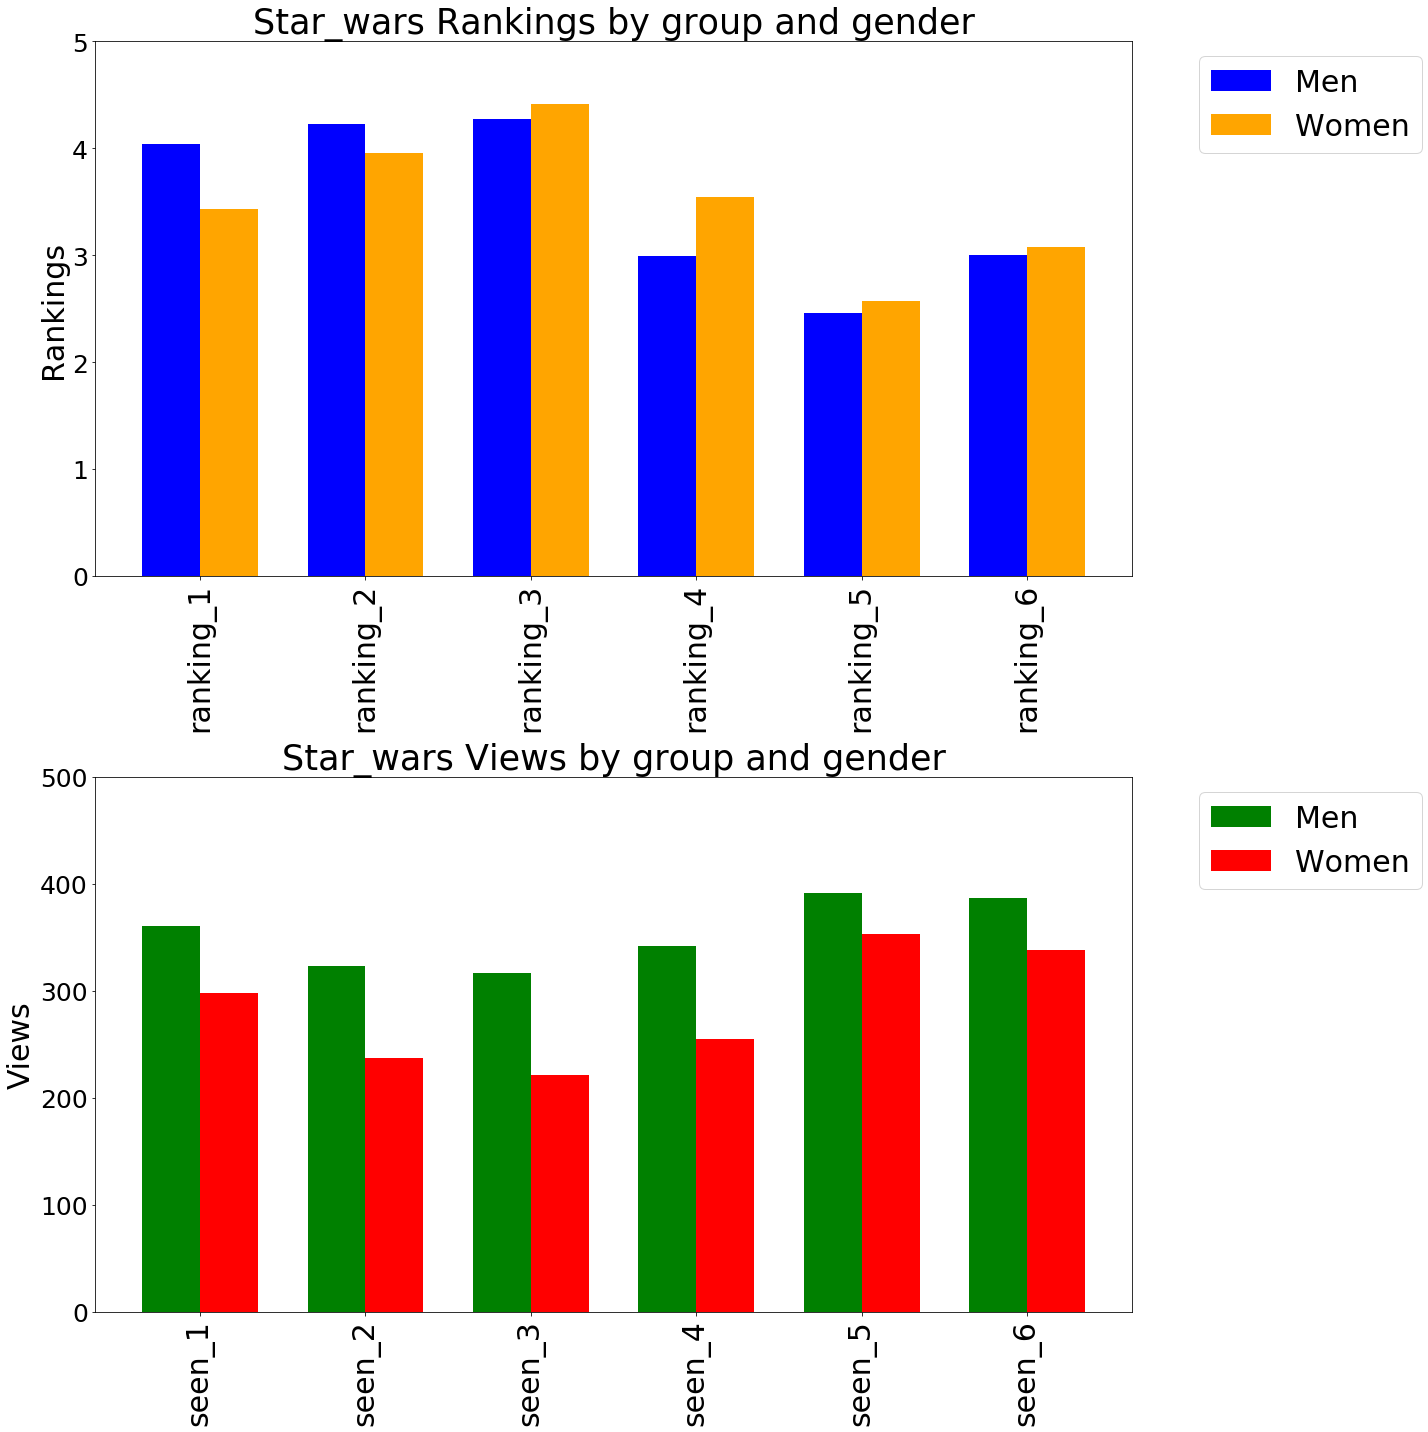

In [13]:
import numpy as np
fig =  plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


labels_1 = males.columns[9:15] 
labels_2 = males.columns[3:9]
x = np.arange(len(labels_1)) # the label locations
width = 0.35  # the width of the bars

rects1 = ax1.bar(x - width/2, male_ranking, width, label='Men', color='blue')
rects2 = ax1.bar(x + width/2, female_ranking, width, label='Women', color='orange')

rects3 = ax2.bar(x - width/2, male_view, width, label='Men', color='green')
rects4 = ax2.bar(x + width/2, female_view, width, label='Women', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Rankings',fontsize = 30.0)
ax1.set_title('Star_wars Rankings by group and gender',size=35)
ax1.set_xticks(x)
ax1.set_xticklabels(labels_1, rotation =90, fontsize = 30.0)
ax1.legend(bbox_to_anchor=(1.05, 1),loc='upper left', fontsize=30)
ax1.yaxis.set_ticks(np.arange(0, 6, 1))
ax1.tick_params(axis='y', labelsize = 25)

ax2.set_ylabel('Views',fontsize = 30.0)
ax2.set_title('Star_wars Views by group and gender',size=35)
ax2.set_xticks(x)
ax2.set_xticklabels(labels_2, rotation =90,fontsize = 30.0)
ax2.legend(bbox_to_anchor=(1.05, 1),loc='upper left', fontsize=30)
ax2.yaxis.set_ticks(np.arange(0, 550, 100))
ax2.tick_params(axis='y', labelsize = 25)

fig.tight_layout()

It looks like male audiences generally rate the Star Wars movies higher than the female, which indicate male audiences are more attracted to the movies. The number of male movie viewer are generally more than the female as well, which supports the above conclusion.


### 8.2 Exploring the Data by Location Segments

['South Atlantic' 'West South Central' 'West North Central'
 'Middle Atlantic' 'East North Central' 'Pacific' 'Mountain' 'New England'
 'East South Central']


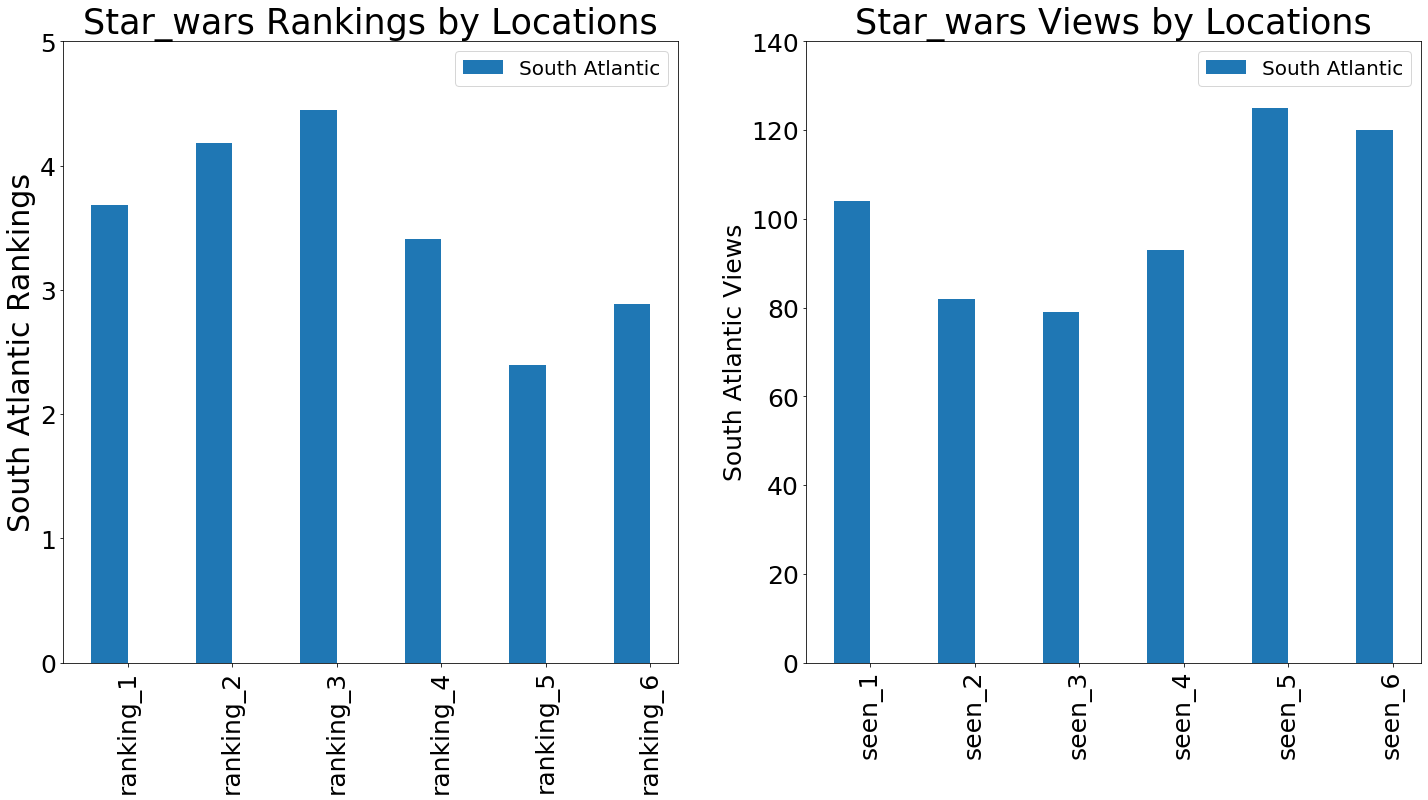

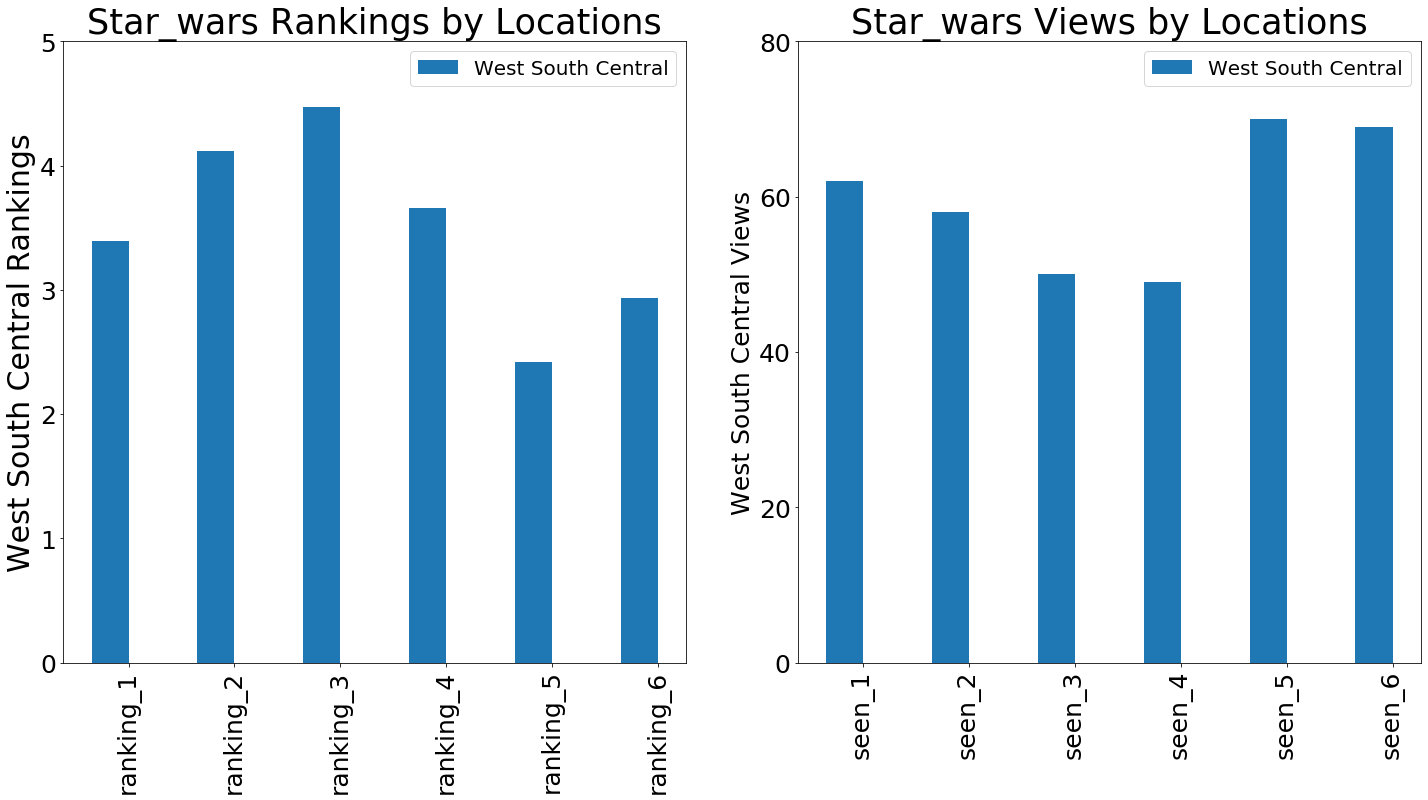

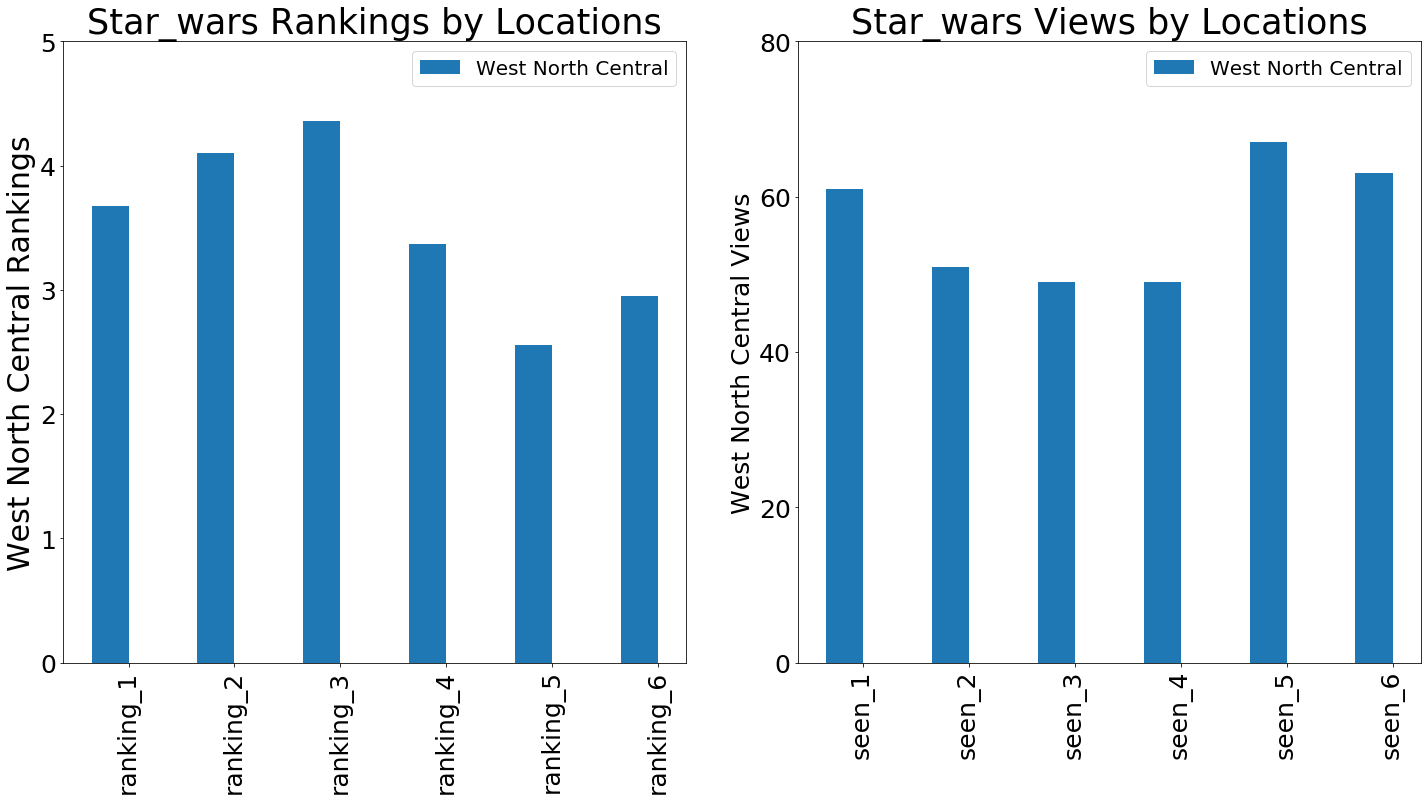

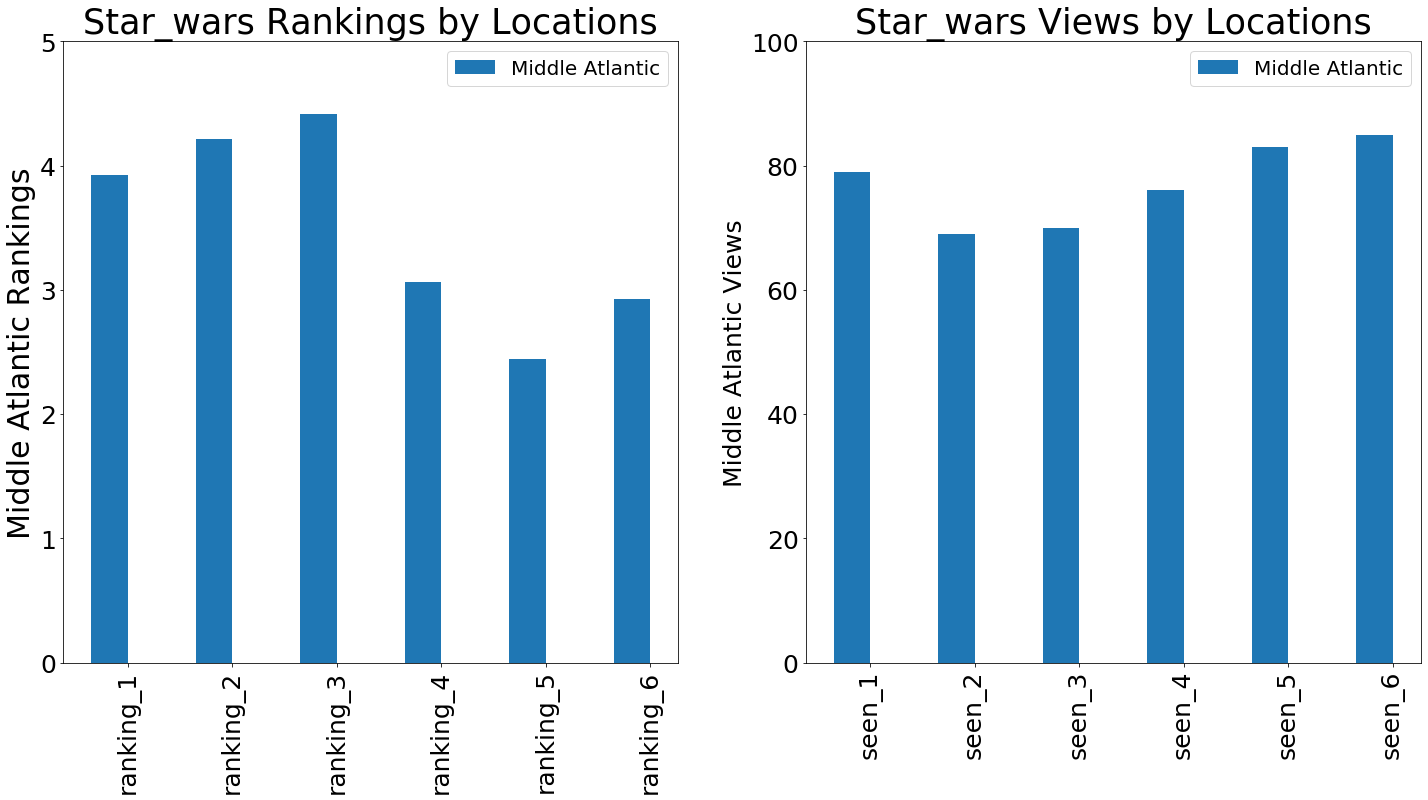

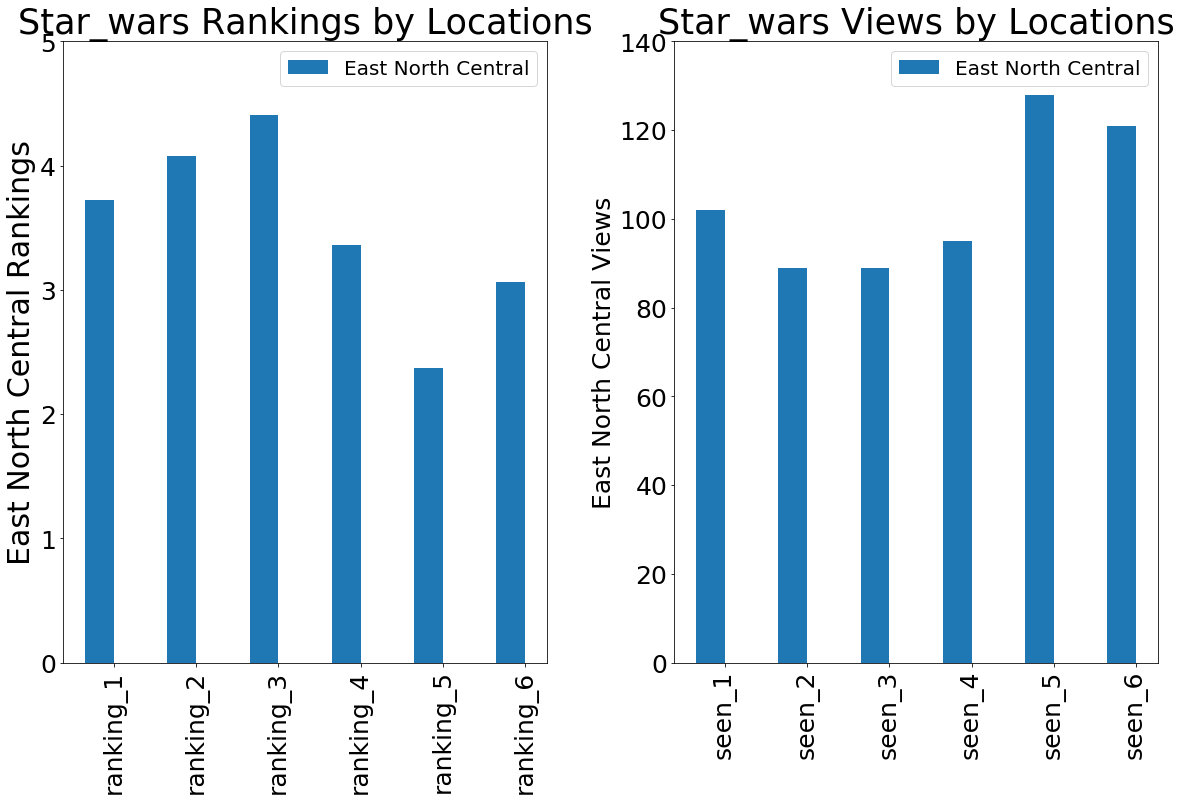

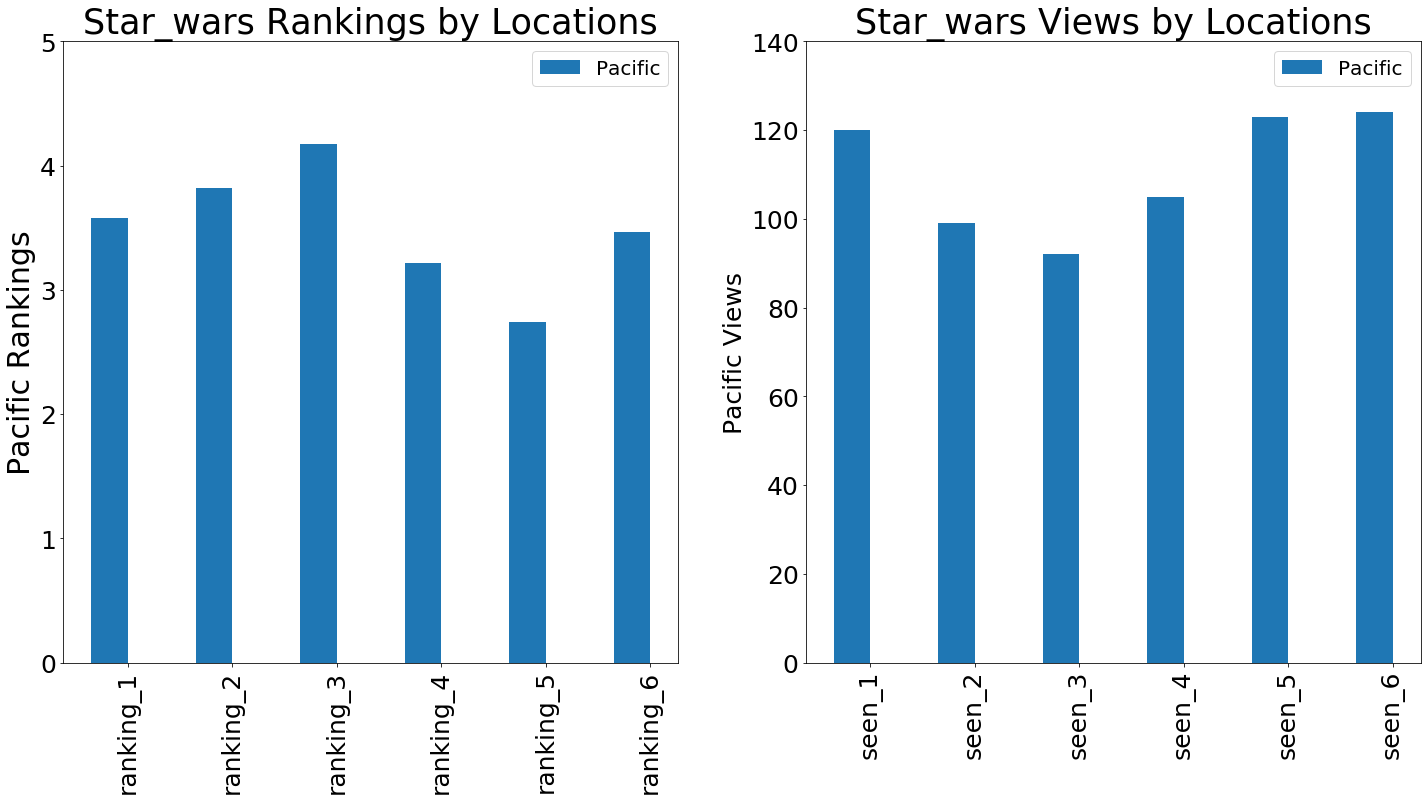

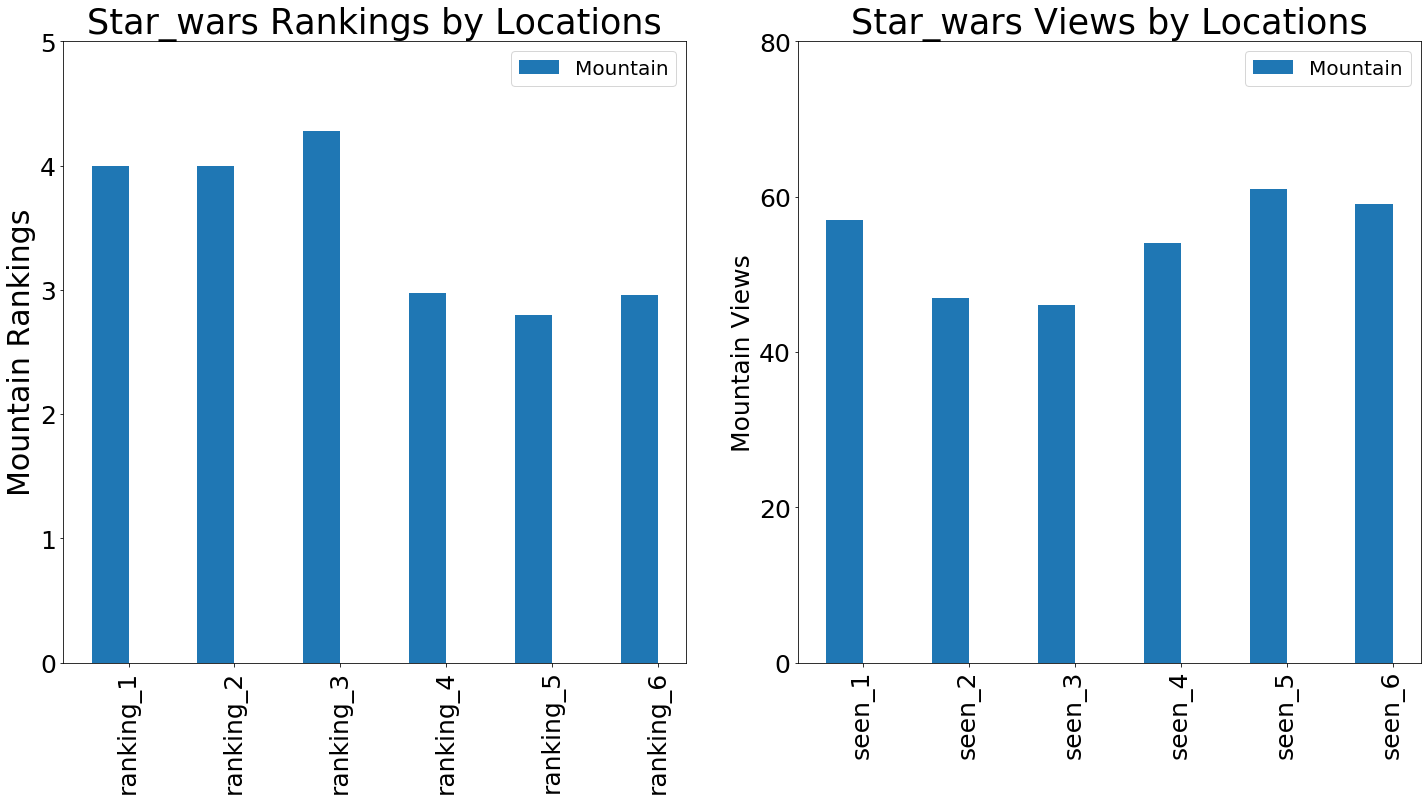

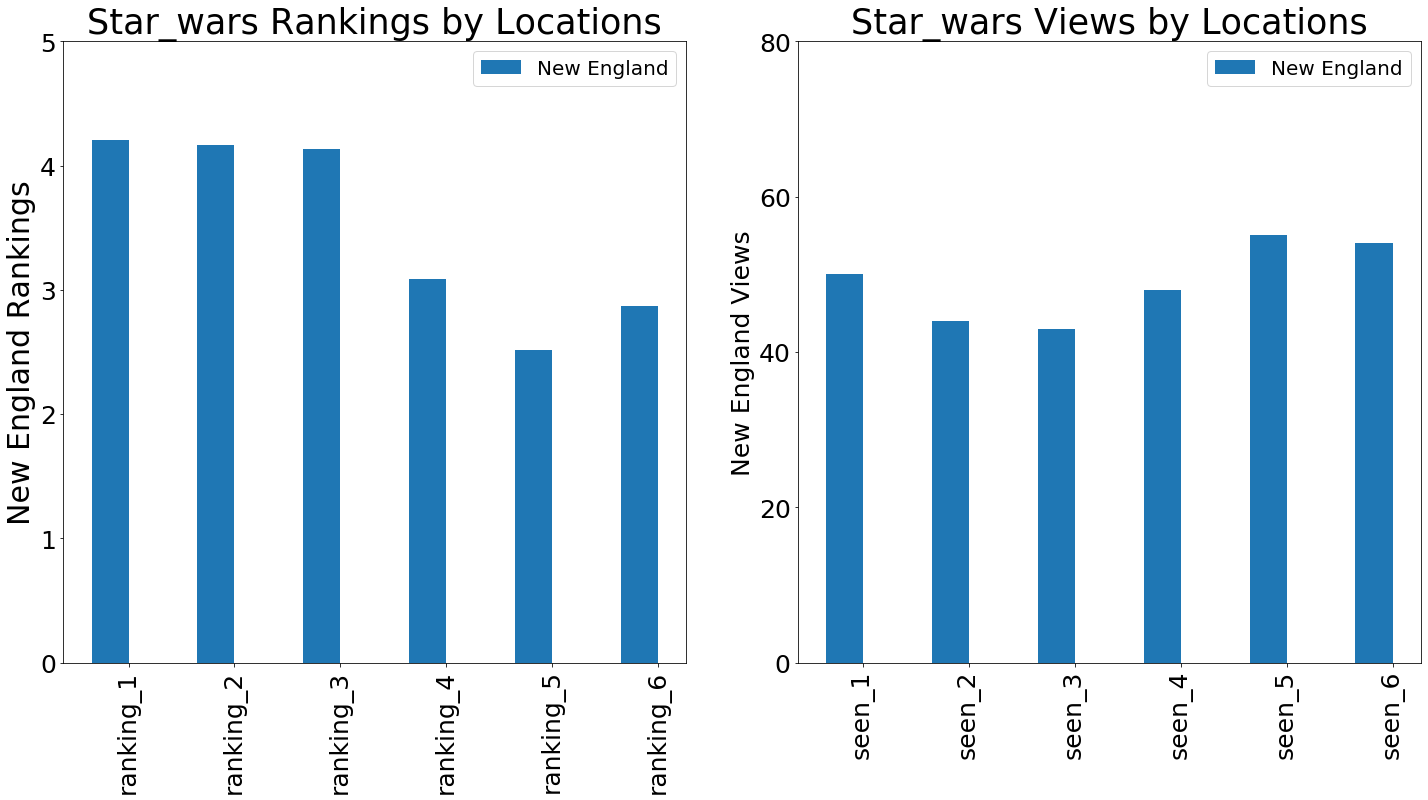

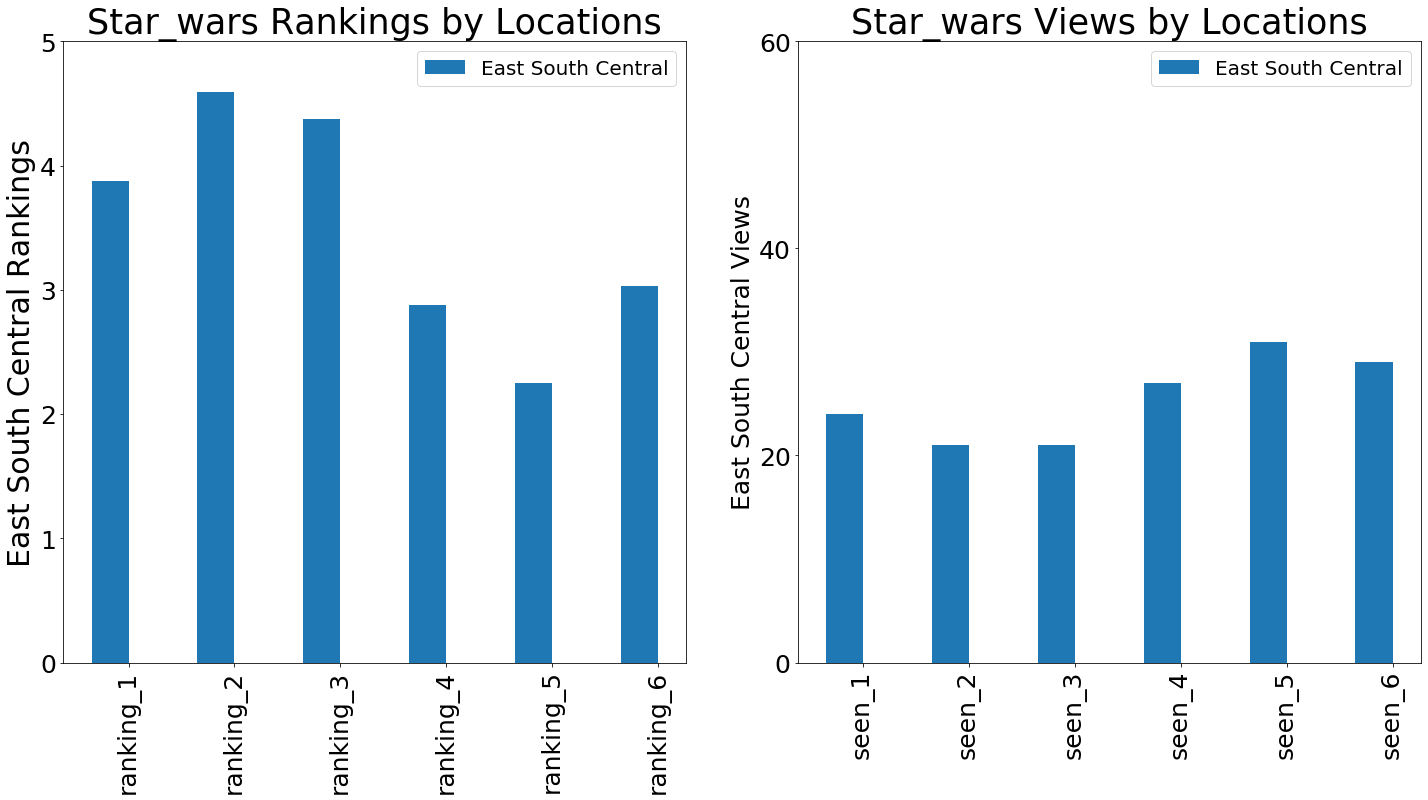

In [14]:
location = star_wars['Location (Census Region)'].unique()
location = np.delete(location,6) #remove nan value
print(location)
i=1
j=2

for loc in location:
    loc_i = star_wars[star_wars['Location (Census Region)'] == loc]
    loc_i_ranking = loc_i.iloc[:,9:15].mean()
    loc_i_view = loc_i.iloc[:,3:9].sum()
    
    # Plot data
    fig =  plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax1.bar(x - width/2, loc_i_ranking, width, label= loc)
    ax2.bar(x - width/2, loc_i_view, width, label=loc)

   
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_ylabel(str(loc) +' Rankings',fontsize = 30.0)
    ax1.set_title('Star_wars Rankings by Locations',size=35)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels_1, rotation =90, fontsize = 25.0)
    ax1.legend(bbox_to_anchor=(1, 1), fontsize=20)
    ax1.yaxis.set_ticks(np.arange(0, 6, 1))
    ax1.tick_params(axis='y', labelsize = 25)
    
    ax2.set_ylabel(str(loc) +' Views',fontsize = 25.0)
    ax2.set_title('Star_wars Views by Locations',size=35)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels_2, rotation =90,fontsize = 25.0)
    ax2.legend(bbox_to_anchor=(1, 1), fontsize=20)
    view_max = max(loc_i_view)+30
    ax2.yaxis.set_ticks(np.arange(0, view_max, 20))
    ax2.tick_params(axis='y', labelsize = 25)

    fig.tight_layout()
    
    i+=1
    j+=1

  


Regardless of the location, the earlier films seem to be more highly rated than the later ones. Similarly, there are more movie viewers for the earlier films. The only exception is Star Wars: Episode I The Phantom Menace: despite being a later film and having a lower ranking, it has more audiences than the 4th movie in most locations. 

## 9. Conclusions:
We have cleaned and analysed the survey data on the response of Star Wars fans towards Star Wars movie. The quesiton we want to answer is:

 **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**
 
We have explored the data from different perspectives including gender, locations, rankings and viewings. According to our exploration results, **The Empire Strikes Back** has been shown to be the most popular and highly rated Star War movie compared to the others. It is clear that the rest of America have realize that “The Empire Strikes Back” is the best of the bunch!